## NY Teacher Evaluation Data

## Package Requirements

In [2]:
import pandas as pd
import numpy as np
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import random
from itertools import chain
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.pre

%matplotlib inline

# launch a qtconsole if first time through
try:
    qtc
except NameError:
    %qtconsole
finally:
    qtc = True

## Domain Notes

This article talks about how teachers are scored

from: http://www.syracuse.com/news/index.ssf/2013/10/how_the_state_teacher_evaluation_works_and_why_syracuse_teachers_struggled.html#incart_river

Article text:

The law establishing the teacher evaluation system in New York mandates that each teacher gets a rating between 1 and 100. Here's how the system works, and where Syracuse's teachers fell short.
<font color='blue'>
* Twenty percent of the evaluation for teachers in grades K-8 is based on how students do on the state's math and English language arts tests, compared to similar students across the state. Teachers whose students don't take state tests are rated on the students' improvement on other tests, some of which were developed by the district.

High school teachers are rated on their students' performance on Regents exams, or other tests if they do not teach a Regents course.

* Another 20 percent of the evaluation is drawn from locally developed measures based on local or state testing.

* The final 60 percent is based on classroom observations and other factors, including feedback from students and parents and a review of the teachers' lesson plans, student portfolios or other material.
</font>  
In Syracuse, teachers excelled on the portion of the evaluation involving classroom observations. Some 97 percent landed in the effective or very effective range on that measure.
Forty percent of Syracuse teachers need improvement plans, early evaluation results show

Jeremy Grant-Skinner, the district's director of talent management, said that's similar to how teachers in many districts fared on their full evaluations before the new system was implemented. In fact, the reality that the vast majority of teachers were typically deemed effective in traditional evaluation systems was a major reason why state and federal officials pushed to create the new ratings.

Syracuse's teachers did not fare as well on the 20 points based on state test scores. Syracuse students in general did not do well on the tests. But because their performance was judged in relation to that of similar students across the state -- in terms of poverty, disability status and other measures -- the teachers did not fare as poorly as they could have.

Just over 20 percent of teachers earned a highly effective rating on the measure, and about 40 percent were rated effective. But almost 20 percent got a developing rating and about 18 percent were rated ineffective.

Teachers did worst on the locally developed testing measure, with some 80 percent in the developing or ineffective categories.

In Syracuse, the district and the union, working together, based the local measures for K-8 teachers on schoolwide improvement on the state's math and English language arts tests.

The goal was to reduce the number of students scoring at the lowest level on the tests by 10 percentage points, and increase those in the highest two levels by five percentage points. Since most students did poorly on the revamped exams given in April, the teachers' scores suffered.

In any given school, every teacher was given the same measure, whether they taught students who took the state tests or not. Even physical education, music and art teachers were rated on that measure.
State teachers leader calls Syracuse the "poster child" for rushed evaluation system

At the high school level, the goal was to increase the number of students reaching proficiency on five core Regents exams by 3 percent each.

The difference in the measures between K-8 and high school teachers may have led to the slightly better scores for high school teachers than for teachers in elementary and middle schools. It also might explain, at least in part, why all the teachers rated highly effective overall are at the high school level.

## Exploratory Work

Our goal is to see if these data are appropriate for use in teaching several concepts of data analysis. The current targeted concepts are:

* linear regression  
* naive bayes  
* decision trees  

Here we will look for appropriate data to use to support these concepts.

### Potential Questions

* Does teacher qualification affect test scores?
* Does teacher qualification affect teacher rating?
* Does teacher rating correlate to test scores?
* Does class size impact test scores?

### Linear Regression

The dataset contains several sets of numeric data. Something basic would be to see the relationship between class size and test results. We will start by focusing on a more specific group and see later if it is appropriate to expand this group.

Question: Is the average class size per school a good predictor of performance on regents tests?

Specific schools are identified in digits 9-12. 

Which tables have the column ENTITY_CD?

Let's filter this data set down to all new york city high schools:

In [3]:
# start with appr_school_researcher_file_data.csv
school_researcher = pd.read_csv('../data/table_export/APPR_SCHOOL_RESEARCHER_FILE_DATA.csv')

In [4]:
print school_researcher.columns
school_researcher.head()

Index([u'DISTRICT_BEDS', u'DISTRICT_NAME', u'SCHOOL_BEDS', u'SCHOOL_NAME', u'EDUCATOR_ID', u'GROWTH_RATING', u'LOCAL_RATING', u'OTHER_RATING', u'OVERALL_RATING', u'OVERALL_SCORE'], dtype='object')


,DISTRICT_BEDS,DISTRICT_NAME,SCHOOL_BEDS,SCHOOL_NAME,EDUCATOR_ID,GROWTH_RATING,LOCAL_RATING,OTHER_RATING,OVERALL_RATING,OVERALL_SCORE
0,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5129448,Effective,Suppressed,Highly Effective,Effective,86
1,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5131556,Suppressed,Suppressed,Highly Effective,Effective,79
2,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5134986,Effective,Suppressed,Effective,Effective,83
3,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5141334,Highly Effective,Suppressed,Effective,Effective,90
4,661401030000,OSSINING UNION FREE SCHOOL DISTRICT,661401030001,BROOKSIDE SCHOOL,5143449,Effective,Suppressed,Effective,Effective,81


In [5]:
school_researcher = school_researcher.loc[school_researcher.DISTRICT_NAME.str.contains('NEW YORK CITY'), :]
school_researcher.OVERALL_SCORE = school_researcher.OVERALL_SCORE.convert_objects(convert_numeric=True)
school_researcher.dropna(inplace=True)
print school_researcher.shape
school_researcher.head()

(28911, 10)


,DISTRICT_BEDS,DISTRICT_NAME,SCHOOL_BEDS,SCHOOL_NAME,EDUCATOR_ID,GROWTH_RATING,LOCAL_RATING,OTHER_RATING,OVERALL_RATING,OVERALL_SCORE
60736,310100010000,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,310100010019,PS 19 ASHER LEVY,5000592,Suppressed,Suppressed,Highly Effective,Highly Effective,92
60737,310100010000,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,310100010019,PS 19 ASHER LEVY,5000674,Suppressed,Suppressed,Highly Effective,Effective,89
60738,310100010000,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,310100010019,PS 19 ASHER LEVY,5003890,Suppressed,Suppressed,Effective,Effective,88
60739,310100010000,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,310100010019,PS 19 ASHER LEVY,5010015,Suppressed,Suppressed,Effective,Effective,85
60740,310100010000,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,310100010019,PS 19 ASHER LEVY,5010607,Suppressed,Suppressed,Effective,Effective,82


(737, 1)


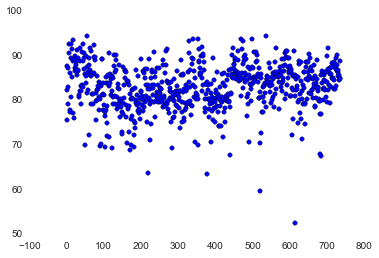

In [6]:
teacher_rating = school_researcher[['SCHOOL_BEDS', 'OVERALL_SCORE']].groupby('SCHOOL_BEDS').mean()
print teacher_rating.shape
plt.scatter(range(teacher_rating.shape[0]), teacher_rating.OVERALL_SCORE)

(array([   1.,    1.,    2.,    5.,   25.,   56.,  200.,  240.,  165.,   42.]),
 array([ 52.75 ,  56.925,  61.1  ,  65.275,  69.45 ,  73.625,  77.8  ,
         81.975,  86.15 ,  90.325,  94.5  ]),
 <a list of 10 Patch objects>)

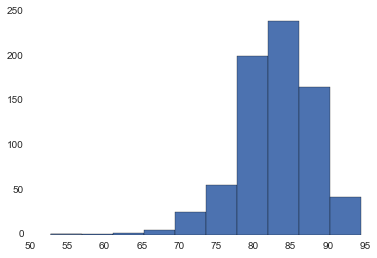

In [7]:
plt.hist(teacher_rating.OVERALL_SCORE.values)

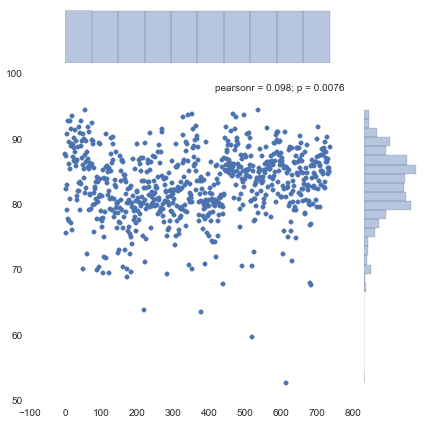

In [8]:
x = np.array(range(teacher_rating.shape[0]))
y = teacher_rating.OVERALL_SCORE.values
sns.jointplot(x, y)

In [9]:
# Rearrange a little:
teacher_rating['ENTITY_CD'] = teacher_rating.index
teacher_rating.reset_index(inplace=True)
print teacher_rating.columns

Index([u'SCHOOL_BEDS', u'OVERALL_SCORE', u'ENTITY_CD'], dtype='object')


We now have a feel for teacher performance per school. Let's see if we can get a feel for academic performance per school to see if the two things are correlated.

We will use the results in Regents_Common_Core_Examination_Annual_Results:

In [10]:
regents_cc = pd.read_csv('../data/table_export/Regents_Common_Core_Examination_Annual_Results.csv')
print regents_cc.shape
print regents_cc.columns
regents_cc.head()

(51546, 16)
Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'SUBJECT', u'SUBGROUP_NAME', u'TESTED', u'NUM_LEVEL1', u'PER_LEVEL1', u'NUM_LEVEL2', u'PER_LEVEL2', u'NUM_LEVEL3', u'PER_LEVEL3', u'NUM_LEVEL4', u'PER_LEVEL4', u'NUM_LEVEL5', u'PER_LEVEL5'], dtype='object')


,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,PER_LEVEL2,NUM_LEVEL3,PER_LEVEL3,NUM_LEVEL4,PER_LEVEL4,NUM_LEVEL5,PER_LEVEL5
0,1,NYC Public Schools,2014,REG_COMENG,All Students,14211,2735,19,1939,14,4663,33,3023,21,1851,13
1,1,NYC Public Schools,2014,REG_COMALG1,All Students,54987,11445,21,11963,22,21562,39,8209,15,1808,03
2,1,NYC Public Schools,2014,REG_COMALG1,American Indian or Alaska Native,365,79,22,70,19,160,44,53,15,3,01
3,1,NYC Public Schools,2014,REG_COMENG,American Indian or Alaska Native,85,13,15,14,16,27,32,21,25,10,12
4,1,NYC Public Schools,2014,REG_COMALG1,Asian or Native Hawaiian/Other Pacific Islander,10407,600,06,943,09,4094,39,3583,34,1187,11


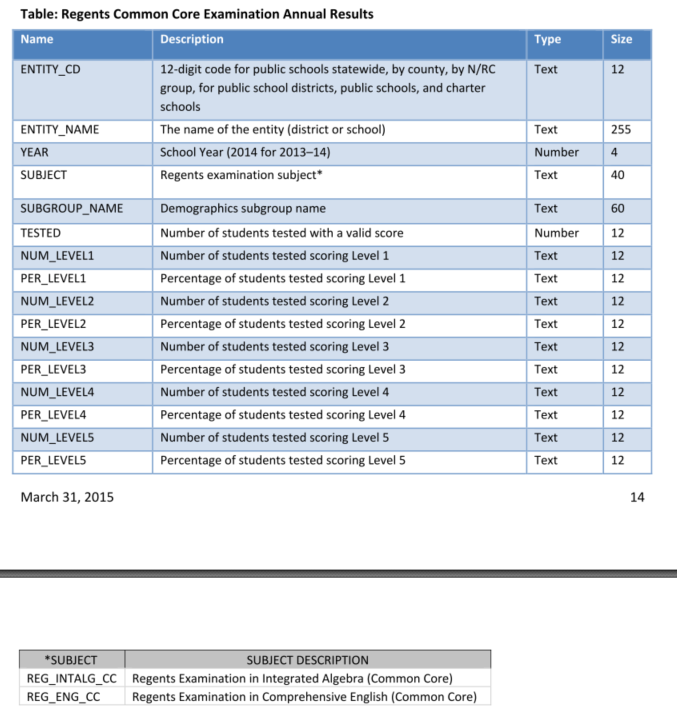

In [11]:
display.Image('regents_cc_table_description.png')

ENTITY_CD

The
ENTITY_CD
in
the
following
tables
is
the
12
‐
digit
Basic
Educational
Data
System
(BEDS)
code
that
uniquely
identifies
the
entity
(school,
district,
etc.).

The
following
information
may
be
useful
to
researchers
who
want
to
select
or
aggregate
data
for
specific
entities.

Digits:
Indicate:

1–2
County
of
Location

3–4
City/Town
of
Location

5–6
School
District
Number

7–8
District
or
LEA
Type

9–12
Reserved
for
Building


In [12]:
# Filter test results
school_ids = school_researcher.SCHOOL_BEDS.unique()
f = [i in school_ids for i in regents_cc.ENTITY_CD]
regents_cc = regents_cc.loc[f, :]
print regents_cc.shape
regents_cc.head(10)

(6485, 16)


,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,PER_LEVEL2,NUM_LEVEL3,PER_LEVEL3,NUM_LEVEL4,PER_LEVEL4,NUM_LEVEL5,PER_LEVEL5
18984,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,All Students,53,0,00,0,00,12,23,26,49,15,28
18985,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,American Indian or Alaska Native,1,s,s,s,s,s,s,s,s,s,s
18986,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Asian or Native Hawaiian/Other Pacific Islander,47,0,00,0,00,12,26,22,47,13,28
18987,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Economically Disadvantaged,39,0,00,0,00,11,28,20,51,8,21
18988,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,English Proficient,53,0,00,0,00,12,23,26,49,15,28
18989,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Female,27,0,00,0,00,6,22,14,52,7,26
18990,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,General Education,50,s,s,s,s,s,s,s,s,s,s
18991,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Hispanic or Latino,1,s,s,s,s,s,s,s,s,s,s
18992,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Male,26,0,00,0,00,6,23,12,46,8,31
18993,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,Multiracial,2,s,s,s,s,s,s,s,s,s,s


In [13]:
# Now lets just look at the 'All Students' subgroup since 
# we're attempting to get a feel for school performance
print regents_cc.SUBGROUP_NAME.unique()
regents_cc = regents_cc.loc[regents_cc.SUBGROUP_NAME == 'All Students', :]

['All Students' 'American Indian or Alaska Native'
 'Asian or Native Hawaiian/Other Pacific Islander'
 'Economically Disadvantaged' 'English Proficient' 'Female'
 'General Education' 'Hispanic or Latino' 'Male' 'Multiracial'
 'Not Economically Disadvantaged' 'Not Migrant' 'Small Group Total'
 'Students with Disabilities' 'White' 'Limited English Proficient'
 'Black or African American']


In [14]:
print regents_cc.SUBGROUP_NAME.unique()
print regents_cc.shape
regents_cc.head()

['All Students']
(466, 16)


,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,PER_LEVEL2,NUM_LEVEL3,PER_LEVEL3,NUM_LEVEL4,PER_LEVEL4,NUM_LEVEL5,PER_LEVEL5
18984,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,All Students,53,0,00,0,00,12,23,26,49,15,28
19022,310100010839,TOMPKINS SQUARE MIDDLE SCHOOL,2014,REG_COMALG1,All Students,20,0,00,0,00,4,20,12,60,4,20
19036,310100011292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2014,REG_COMALG1,All Students,23,9,39,11,48,3,13,0,00,0,00
19082,310100011458,FORSYTHE SATELLITE ACADEMY,2014,REG_COMENG,All Students,31,9,29,6,19,13,42,3,10,0,00
19111,310100011515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,2014,REG_COMALG1,All Students,78,8,10,18,23,27,35,16,21,9,12


Take a quick look at one school:

In [15]:
regents_cc.loc[regents_cc.ENTITY_CD == 310100010184, :]

,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,PER_LEVEL2,NUM_LEVEL3,PER_LEVEL3,NUM_LEVEL4,PER_LEVEL4,NUM_LEVEL5,PER_LEVEL5
18984,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,All Students,53,0,00,0,00,12,23,26,49,15,28


In [16]:
sub = regents_cc.SUBJECT.unique()
print "Subjects tested: {}".format(sub)
print
print "quick summary:"
print regents_cc.SUBJECT.describe()
print
print "There are {} unique entities listed".format(len(regents_cc.ENTITY_NAME.unique()))
t1 = sum(regents_cc.SUBJECT == regents_cc.SUBJECT.unique()[0])
t2 = sum(regents_cc.SUBJECT == regents_cc.SUBJECT.unique()[1])
print "There are {} listings for {}".format(t1, sub[0])
print "There are {} listings for {}".format(t2, sub[1])

Subjects tested: ['REG_COMALG1' 'REG_COMENG']

quick summary:
count             466
unique              2
top       REG_COMALG1
freq              347
Name: SUBJECT, dtype: object

There are 348 unique entities listed
There are 347 listings for REG_COMALG1
There are 119 listings for REG_COMENG


It appears that almost every unique entry has a result for REG_COMALG1, so use that as a proxy for how well the school is doing academically. This could be too narrow a focus ...

In [17]:
regents_cc = regents_cc.loc[regents_cc.SUBJECT == 'REG_COMALG1', :]
print regents_cc.shape
regents_cc.head()

(347, 16)


,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,TESTED,NUM_LEVEL1,PER_LEVEL1,NUM_LEVEL2,PER_LEVEL2,NUM_LEVEL3,PER_LEVEL3,NUM_LEVEL4,PER_LEVEL4,NUM_LEVEL5,PER_LEVEL5
18984,310100010184,PS 184 SHUANG WEN,2014,REG_COMALG1,All Students,53,0,00,0,00,12,23,26,49,15,28
19022,310100010839,TOMPKINS SQUARE MIDDLE SCHOOL,2014,REG_COMALG1,All Students,20,0,00,0,00,4,20,12,60,4,20
19036,310100011292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2014,REG_COMALG1,All Students,23,9,39,11,48,3,13,0,00,0,00
19111,310100011515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,2014,REG_COMALG1,All Students,78,8,10,18,23,27,35,16,21,9,12
19168,310100011650,CASCADES HIGH SCHOOL,2014,REG_COMALG1,All Students,9,2,22,6,67,1,11,0,00,0,00


Last we want a summary statistic for each school. We will use a weighted average to come up with an average level per school

In [18]:
# There are a few schools with a score of 's'. Let's drop these:
regents_cc = regents_cc.loc[regents_cc.PER_LEVEL1 != 's', :]
regents_cc.shape

(334, 16)

In [19]:
per_cols = ['PER_LEVEL1', 'PER_LEVEL2', 'PER_LEVEL3', 'PER_LEVEL4', 'PER_LEVEL5']
overall = np.array([0.]*regents_cc.shape[0])
for i, c in enumerate(per_cols):
    overall += (i+1) * (regents_cc[c].values.astype(float) / 100)
regents_cc['AVG_LEVEL'] = overall

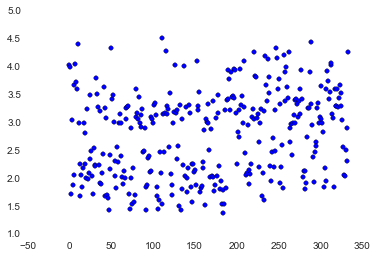

In [20]:
plt.scatter(range(len(overall)), overall)

(array([ 21.,  41.,  57.,  27.,  16.,  70.,  49.,  21.,  22.,  10.]),
 array([ 1.39 ,  1.704,  2.018,  2.332,  2.646,  2.96 ,  3.274,  3.588,
         3.902,  4.216,  4.53 ]),
 <a list of 10 Patch objects>)

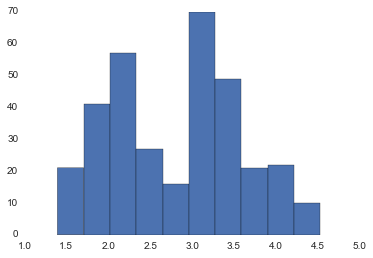

In [21]:
plt.hist(overall)

Interesting. It looks bimodal. Could be interesting to see see if there are two "types" of schools ...

In the mean time, we now have an academic rating for these schools, let's pair that with an average teacher rating and see what we get.

In [22]:
ny_schools = pd.merge(regents_cc, teacher_rating, how='left',
                   on='ENTITY_CD')
print ny_schools.shape

(334, 19)


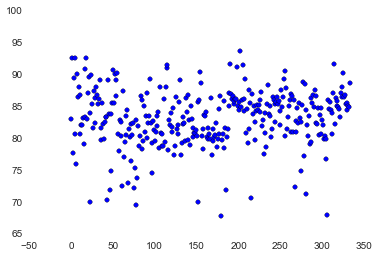

In [23]:
plt.scatter(range(ny_schools.shape[0]), ny_schools.OVERALL_SCORE)

(array([  6.,   8.,   5.,  12.,  62.,  72.,  81.,  57.,  23.,   8.]),
 array([ 67.94444444,  70.5384058 ,  73.13236715,  75.7263285 ,
         78.32028986,  80.91425121,  83.50821256,  86.10217391,
         88.69613527,  91.29009662,  93.88405797]),
 <a list of 10 Patch objects>)

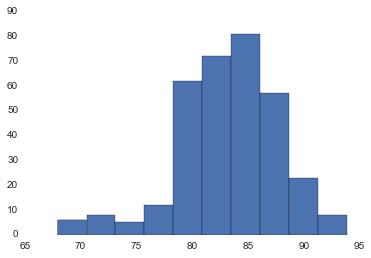

In [24]:
plt.hist(ny_schools.OVERALL_SCORE)

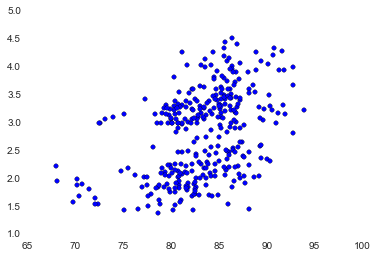

In [25]:
plt.scatter(ny_schools.OVERALL_SCORE, ny_schools.AVG_LEVEL)

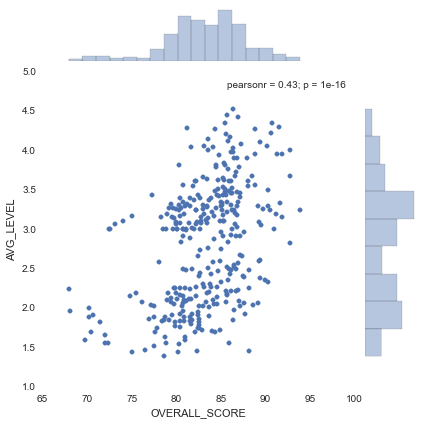

In [26]:
sns.jointplot(ny_schools.OVERALL_SCORE, ny_schools.AVG_LEVEL)

So we need to examine this bimodal behavior. My current hypothesis is that there is demographic infomation that can explain this, so let's add some demographics into our current ny_schools data.

In [27]:
demographics = pd.read_csv('../data/table_export/Demographic_Factors.csv')
print demographics.shape
print demographics.columns
demographics.head()

(16533, 29)
Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'NUM_FREE_LUNCH', u'PER_FREE_LUNCH', u'NUM_REDUCED_LUNCH', u'PER_REDUCED_LUNCH', u'NUM_LEP', u'PER_LEP', u'NUM_AM_IND', u'PER_AM_IND', u'NUM_BLACK', u'PER_BLACK', u'NUM_HISP', u'PER_HISP', u'NUM_ASIAN', u'PER_ASIAN', u'NUM_WHITE', u'PER_WHITE', u'NUM_Multi', u'PER_Multi', u'NUM_SWD', u'PER_SWD', u'NUM_FEMALE', u'PER_FEMALE', u'NUM_MALE', u'PER_MALE', u'NUM_ECDIS', u'PER_ECDIS'], dtype='object')


,ENTITY_CD,ENTITY_NAME,YEAR,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,PER_LEP,NUM_AM_IND,...,NUM_Multi,PER_Multi,NUM_SWD,PER_SWD,NUM_FEMALE,PER_FEMALE,NUM_MALE,PER_MALE,NUM_ECDIS,PER_ECDIS
0,1,NYC Public Schools,2013,578885,60,64793,7,143664,15,6466,...,5138,1,169665,18,467160,49,495859,51,781786,81
1,2,Large Cities,2013,77677,75,5113,5,12563,12,813,...,1688,2,19466,19,51000,49,53036,51,84347,81
2,3,High Need/Resource Urban-Suburban Districts,2013,121243,60,18782,9,24961,12,755,...,4278,2,29416,15,98366,49,104048,51,142185,70
3,4,High Need/Resource Rural Districts,2013,61668,41,16990,11,1379,1,2621,...,2536,2,21653,14,73895,49,76377,51,79993,53
4,5,Average Need Districts,2013,181069,23,57141,7,18805,2,3197,...,12558,2,102401,13,378470,49,396795,51,248019,32


In [28]:
# filter out entities not in ny_school
f = [i in ny_schools.ENTITY_CD.unique() for i in demographics.ENTITY_CD]
demographics = demographics.loc[f, :]
demographics.shape

(997, 29)

In [29]:
# Now let's just use information from 2014
demographics = demographics.loc[demographics.YEAR == 2014, :]
demographics.shape

(334, 29)

In [30]:
print demographics.columns
demographics.head()

Index([u'ENTITY_CD', u'ENTITY_NAME', u'YEAR', u'NUM_FREE_LUNCH', u'PER_FREE_LUNCH', u'NUM_REDUCED_LUNCH', u'PER_REDUCED_LUNCH', u'NUM_LEP', u'PER_LEP', u'NUM_AM_IND', u'PER_AM_IND', u'NUM_BLACK', u'PER_BLACK', u'NUM_HISP', u'PER_HISP', u'NUM_ASIAN', u'PER_ASIAN', u'NUM_WHITE', u'PER_WHITE', u'NUM_Multi', u'PER_Multi', u'NUM_SWD', u'PER_SWD', u'NUM_FEMALE', u'PER_FEMALE', u'NUM_MALE', u'PER_MALE', u'NUM_ECDIS', u'PER_ECDIS'], dtype='object')


,ENTITY_CD,ENTITY_NAME,YEAR,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,PER_LEP,NUM_AM_IND,...,NUM_Multi,PER_Multi,NUM_SWD,PER_SWD,NUM_FEMALE,PER_FEMALE,NUM_MALE,PER_MALE,NUM_ECDIS,PER_ECDIS
12851,310100010184,PS 184 SHUANG WEN,2014,389,61,69,11,93,15,9,...,5,1,78,12,322,50,316,50,458,72
12861,310100010839,TOMPKINS SQUARE MIDDLE SCHOOL,2014,224,60,36,10,19,5,3,...,6,2,100,27,203,54,173,46,260,69
12862,310100011292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2014,256,82,7,2,63,20,4,...,7,2,105,33,123,39,191,61,263,84
12867,310100011515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,2014,205,43,3,1,352,73,1,...,9,2,12,3,203,42,277,58,209,44
12869,310100011650,CASCADES HIGH SCHOOL,2014,153,72,14,7,4,2,0,...,1,0,21,10,120,57,92,43,167,79


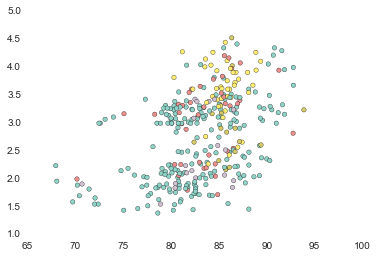

In [76]:
km = KMeans(n_clusters=5)
km.fit(demographics.iloc[:, 3:])
y = km.predict(demographics.iloc[:, 3:])
clusters = pd.DataFrame()
clusters['ENTITY_CD'] = demographics.ENTITY_CD
clusters['CLUSTER'] = y
clusters = pd.merge(clusters, ny_schools, on='ENTITY_CD')

plt.set_cmap('Set3')
plt.scatter(clusters.OVERALL_SCORE, clusters.AVG_LEVEL, c=clusters.CLUSTER)

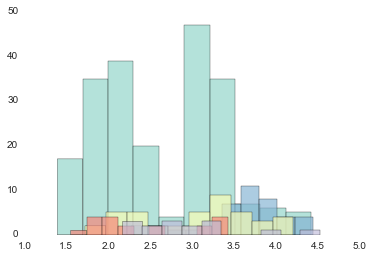

In [77]:
color_list = plt.cm.Set3( np.linspace(0, 1, 12) )
color_list = np.array([[i[0], i[1], i[2], .65] for i in color_list])

fig, ax = plt.subplots()
for cl in clusters.CLUSTER.unique():
    d = clusters.AVG_LEVEL[clusters.CLUSTER == cl].values
    ax.hist(d, color=color_list[cl])

I don't see anything jumping out at me. I tried different values for the clusters.


Before I continue, let's see what the two clusters look like in the scatter plot

(array([ 11.,  33.,  39.,  35.,  20.,  11.,  12.,  12.,   8.,   3.]),
 array([ 2.75 ,  2.928,  3.106,  3.284,  3.462,  3.64 ,  3.818,  3.996,
         4.174,  4.352,  4.53 ]),
 <a list of 10 Patch objects>)

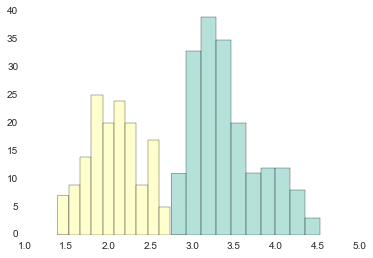

In [33]:
f = clusters.AVG_LEVEL < 2.75

fig, ax = plt.subplots()
ax.hist(clusters.AVG_LEVEL[f].values, color=color_list[1])
ax.hist(clusters.AVG_LEVEL[[not i for i in f]].values, color=color_list[0])

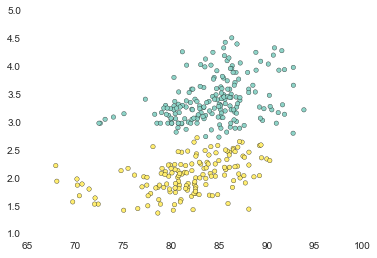

In [34]:
plt.scatter(clusters.OVERALL_SCORE, clusters.AVG_LEVEL, c=f.values.astype(int))

Now let's look at things like:
* class size - Average_Class_Size.csv
* needs index - BOCES_and_N-RC.csv

And staff related:
* total number of teachers
* % no valid certification
* % with expired certification
* % with fewer than 3 years of experience
* % with masters + 30 hrs or phd
* number of core classes
* % core classes not taught by "highly qualified" teachers
* total number of classes taught
* % classes taught by teachers w/o appropriate certification
* turnover rate of teachers with less than 5 yrs of experience
* turnover rate of all teachers
* \# full time staff other than teachers, principles, asst. principles
* \# part time staff other than teachers, principles, asst. principles
* num full time paraprofessionals
* num part time paraprofessionals
* num full time asst. principles
* num part time asst. principles
* num full time principles
* num part time principles

In [81]:
staff = pd.read_csv('../data/table_export/Staff.csv')
print staff.shape
for i, n in enumerate(staff.columns):
    print "{:3}: {}".format(i, n)

(16321, 34)
  0: ENTITY_CD
  1: SCHOOL_NAME
  2: YEAR
  3: DISTRICT_CD
  4: DISTRICT_NAME
  5: CSO_NAME
  6: STREET
  7: CITY
  8: PHONE
  9: GRADE_RANGE
 10: NUM_TEACH
 11: NUM_NO_VALID_CERT
 12: PER_NO_VALID_CERT
 13: NUM_TEACH_OUT_CERT
 14: PER_TEACH_OUT_CERT
 15: NUM_FEWER_3YRS_EXP
 16: PER_FEWER_3YRS_EXP
 17: NUM_MAS_PLUS
 18: PER_MAS_PLUS
 19: NUM_CORE
 20: PER_NOT_HQ
 21: NUM_CLASS
 22: NUM_NO_APPROP_CERT
 23: PER_NO_APPROP_CERT
 24: PER_TURN_FIVE_YRS
 25: PER_TURN_ALL
 26: NUM_FT_OTH_PROF_STAFF
 27: NUM_PT_OTH_PROF_STAFF
 28: NUM_FT_PARAPROFESSIONALS
 29: NUM_PT_PARAPROFESSIONALS
 30: NUM_FT_ASST_PRINCIPALS
 31: NUM_PT_ASST_PRINCIPALS
 32: NUM_FT_PRINCIPALS
 33: NUM_PT_PRINCIPALS


Again, let's filter this down to just the entitys in our ny_schools data.
staff is imported with 16321 rows, this should cut it down to 997.

In [82]:
fil = [i in ny_schools.ENTITY_CD.values for i in staff.ENTITY_CD.values]
staff = staff.loc[fil, :]
staff.shape

(997, 34)

In [83]:
# staff.YEAR.unique()
# array([2012, 2014, 2013], dtype=int64)

# Save just the latest year
staff = staff.loc[staff.YEAR == 2014, :]
staff.shape

(334, 34)

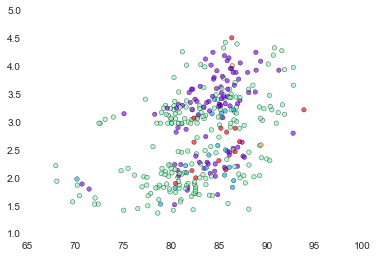

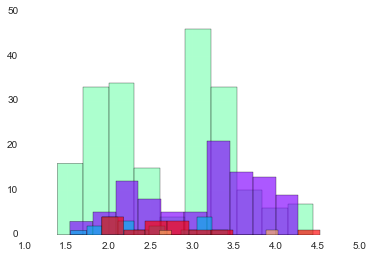

In [137]:
n_clusters = 5
col_range = range(10, 24) + range(26, 34)

color_list = plt.cm.rainbow( np.linspace(0, 1, n_clusters) )
color_list = np.array([[i[0], i[1], i[2], .65] for i in color_list])

# now run clustering
km = KMeans(n_clusters=n_clusters)

km.fit(staff.iloc[:, col_range])
y = km.predict(staff.iloc[:, col_range])
clusters = pd.DataFrame()
clusters['ENTITY_CD'] = staff.ENTITY_CD
clusters['CLUSTER'] = y
clusters = pd.merge(clusters, ny_schools, on='ENTITY_CD')

plt.set_cmap('Set3')
plt.scatter(clusters.OVERALL_SCORE, clusters.AVG_LEVEL, 
            c=color_list[clusters.CLUSTER])




fig, ax = plt.subplots()
for cl in clusters.CLUSTER.unique():
    d = clusters.AVG_LEVEL[clusters.CLUSTER == cl].values
    ax.hist(d, color=color_list[cl])

In [37]:
accountability = pd.read_csv('../data/table_export/Accountability.csv')
print accountability.columns
accountability.head()

Index([u'ENTITY_CD', u'ENTITY_NAME', u'ACC_YEAR', u'ACCOUNTABILITYMEASURE', u'ACC_NAME', u'NUM_ENROLL', u'NUM_PARTIC', u'PER_PARTIC', u'NUM_PERF', u'PI_G_RATE', u'AMO_STAND', u'CURRENT_SH_TARGET', u'MET_PART', u'MET_PERF', u'AYP'], dtype='object')


C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (6,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,ENTITY_CD,ENTITY_NAME,ACC_YEAR,ACCOUNTABILITYMEASURE,ACC_NAME,NUM_ENROLL,NUM_PARTIC,PER_PARTIC,NUM_PERF,PI_G_RATE,AMO_STAND,CURRENT_SH_TARGET,MET_PART,MET_PERF,AYP
0,331300011430,BROOKLYN TECHNICAL HIGH SCHOOL,2012,High School Math,Hispanic or Latino,85,85,100,84,192,97,NaN,Y,Y,YES
1,331300011430,BROOKLYN TECHNICAL HIGH SCHOOL,2012,High School Math,Male,720,720,100,705,195,NaN,NaN,NaN,NaN,NaN
2,331300011430,BROOKLYN TECHNICAL HIGH SCHOOL,2012,High School Math,Multiracial,2,s,s,2,s,s,s,s,s,s
3,331300011430,BROOKLYN TECHNICAL HIGH SCHOOL,2012,High School Math,Not American Indian or Alaska Native,1277,1277,100,1253,196,NaN,NaN,NaN,NaN,NaN
4,331300011430,BROOKLYN TECHNICAL HIGH SCHOOL,2012,High School Math,Not Asian or Pacific Islander,517,517,100,506,194,NaN,NaN,NaN,NaN,NaN


In [38]:
fil = [i in ny_schools.ENTITY_CD.values for i in accountability.ENTITY_CD.values]
accountability = accountability.loc[fil, :]
accountability.shape

(89075, 15)

In [39]:
accountability = accountability.loc[accountability.ACC_YEAR == 2014, :]
accountability.shape

(31869, 15)

- - -

Next I want to categorize this and see if there is a relationship between score and other school features:
* average class size
* etc.

Or teacher features:
* education
* certified
* etc.

Also, this is a plot of average teacher rating per school. We now need an average test statistic per school to see if teacher rating is correlated to test performance

## Appendix

### Data Sources

Data from http://data.nysed.gov/evaluation.php?year=2014&state=yes&report=appr  

Downloaded on 4/18/2015 in three files: 

* 3-8-2014-14.zip  
* NYSTATE_EVAL_2014.zip  
* SRC2014.zip  

These zip files contained MS Access .mdb files  

In order to import the data into python using pandas, I exported all tables with the following vba:

### Data Dictionary for SRC2014.mdb

List of tables on page 2

In [40]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('Read_Me.pdf', size=(800, 800))